# Dataset AVC

- Representa um Dataset com dados reais de pessoas que tiveram AVC, e seus dados de sáude, temperatura, idade, etc

In [18]:
# Importações
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Caminho padrão do dataset sintético
csv_path = "healthcare-dataset-stroke-data.csv"
# Carregar o dataset
df = pd.read_csv(csv_path)

# Mostrar as 5 primeiras linhas
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


- Importando o dataset e mostrando a cabeça com as 5 primeiras linhas;

In [19]:
df.info();
df.describe();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- Vendo os tipos da tabela e colunas presentes;

In [20]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


### Identificação

- Identificando os valores nulos a partir de cada coluna;

Foi identificado na coluna BMI, que é o IMC de massa corporal dos pacientes, com valores nulos, então preciso de uma estratégia para o que fazer com esses valores na coluna, com 201 valores nulos, como mostra a tabela;

In [21]:
# Flag de faltante
df["bmi_missing"] = df["bmi"].isna().astype(int)

In [22]:
to_drop = df["bmi"].isna().sum()
print("Linhas com bmi nulo:", to_drop)

# Dropar e resetar índice
df_clean = df.dropna(subset=["bmi"]).reset_index(drop=True)

# Log rápido
removed = to_drop
pct_removed = removed / (removed + len(df_clean))
print(f"Removidas {removed} linhas ({pct_removed:.2%}). Linhas restantes: {len(df_clean)}")

Linhas com bmi nulo: 201
Removidas 201 linhas (3.93%). Linhas restantes: 4909


In [23]:
df_clean.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_missing
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,0


In [24]:
df_clean.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [25]:
df = df_clean

In [26]:
if "bmi_missing" in df.columns:
    df = df.drop(columns=["bmi_missing"])

In [27]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Reset de valores nulos

Por se tratar de dados sensíveis, e reais, a partir de uma doença, AVC, a partir de pacientes. Foi feito um reset, com os dados de BMI que estão vazios;

### Passo a passo

## Passo a passo (resumo do que você fez + explicação curta)

1. **Importar e visualizar**

```python
import pandas as pd
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()
```

* Carrega o CSV e mostra uma amostra para entender colunas e valores.

2. **Diagnóstico inicial**

```python
df.info()
df.isnull().sum()
```

* `info()` revela tipos e contagem de não-nulos.
* `isnull().sum()` mostra onde há valores ausentes (ex.: `bmi` com 201 NaNs).

3. **(Opcional) Criar flag de faltante**

```python
df["bmi_missing"] = df["bmi"].isna().astype(int)
```

* Cria uma coluna indicadora (0/1) para registrar que o BMI estava ausente — útil para análise/modelo.

4. **Decisão de limpeza: remover linhas com `bmi` nulo**

```python
df_clean = df.dropna(subset=["bmi"]).reset_index(drop=True)
```

* Remove apenas registros com `bmi` vazio, mantendo o restante dos dados.

5. **Checar resultado da limpeza**

```python
df_clean.isnull().sum()
df_clean.shape
```

* Confirma que `bmi` não tem mais nulos e quantas linhas restaram.

6. **Remover a flag (se não for mais usar)**

```python
if "bmi_missing" in df_clean.columns:
    df_clean = df_clean.drop(columns=["bmi_missing"])
```

* Elimina a coluna auxiliar para deixar o dataset “limpo”.

7. **(Opcional) Adotar o `df_clean` como base oficial**

```python
df = df_clean.copy()
```

* Substitui o `df` original pelo conjunto limpo para as próximas etapas.

In [28]:
# Padronizar categorias e tipar
cat_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
for c in cat_cols:
    df[c] = df[c].astype(str).str.strip().str.lower()
df[cat_cols] = df[cat_cols].astype("category")


In [29]:
df.dtypes

,0
id,int64
gender,category
age,float64
hypertension,int64
heart_disease,int64
ever_married,category
work_type,category
Residence_type,category
avg_glucose_level,float64
bmi,float64


In [30]:
print(df["work_type"].cat.categories)
print(df["smoking_status"].cat.categories)

Index(['children', 'govt_job', 'never_worked', 'private', 'self-employed'], dtype='object')
Index(['formerly smoked', 'never smoked', 'smokes', 'unknown'], dtype='object')


## Categorizando

As colunas que tinham valores padrões para serem colocados, foi feito, pois são categorias, e vão valores indepententes

In [31]:
print("Nulos por coluna:\n", df.isna().sum().to_string())
print("\nResumo numérico:\n", df[['age','avg_glucose_level','bmi']].describe())
print("\nBalanceamento do alvo:\n", df['stroke'].value_counts(normalize=True).rename('proporção'))

Nulos por coluna:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0

Resumo numérico:
                age  avg_glucose_level          bmi
count  4909.000000        4909.000000  4909.000000
mean     42.865374         105.305150    28.893237
std      22.555115          44.424341     7.854067
min       0.080000          55.120000    10.300000
25%      25.000000          77.070000    23.500000
50%      44.000000          91.680000    28.100000
75%      60.000000         113.570000    33.100000
max      82.000000         271.740000    97.600000

Balanceamento do alvo:
 stroke
0    0.957425
1    0.042575
Name: proporção, dtype: float64


## Resumo dos valores

Depois de ter sido feito a limpeza, ainda podemos ver os valores e colunas que estão limpos agora;

In [32]:
# criar faixas de idade
age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 200]
age_labels = ["<18","18-29","30-39","40-49","50-59","60-69","70-79","80+"]

df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=False)
df["age_group"] = df["age_group"].astype("category")


In [33]:
df = df.drop(columns=["age"])
df.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,male,0,1,yes,private,urban,228.69,36.6,formerly smoked,1,60-69
1,31112,male,0,1,yes,private,rural,105.92,32.5,never smoked,1,80+
2,60182,female,0,0,yes,private,urban,171.23,34.4,smokes,1,40-49
3,1665,female,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1,70-79
4,56669,male,0,0,yes,private,urban,186.21,29.0,formerly smoked,1,80+


## Padronização

Colocando escalas e faixas de idade para serem feitas, assim podemos não gerar com valores independentes, mas sim, faixas de idade.

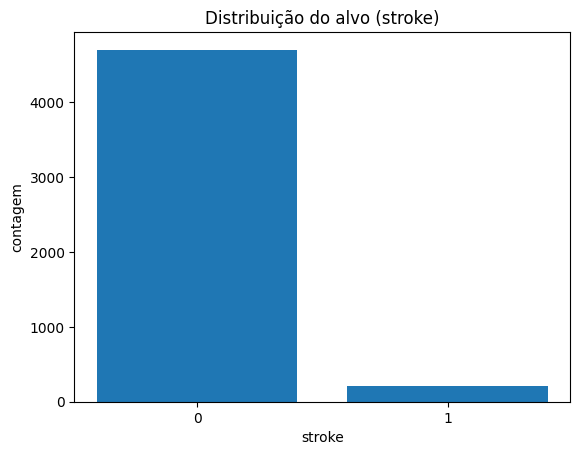

In [33]:
import matplotlib.pyplot as plt
import numpy as np

vals = df["stroke"].value_counts().sort_index()
plt.figure()
plt.bar(vals.index.astype(str), vals.values)
plt.title("Distribuição do alvo (stroke)")
plt.xlabel("stroke")
plt.ylabel("contagem")
plt.show()


## Observação do gráfico

Podemos ver que existem poucas ocorrências de AVC, então isso, gera que cerca de 4% dos registros configuram um caso de AVC. Um desbalanceamento grande.


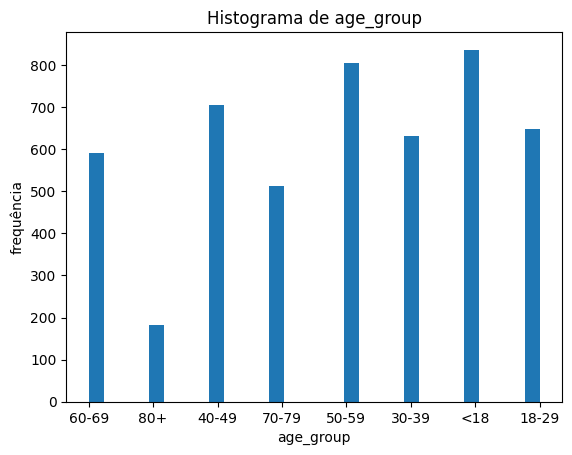

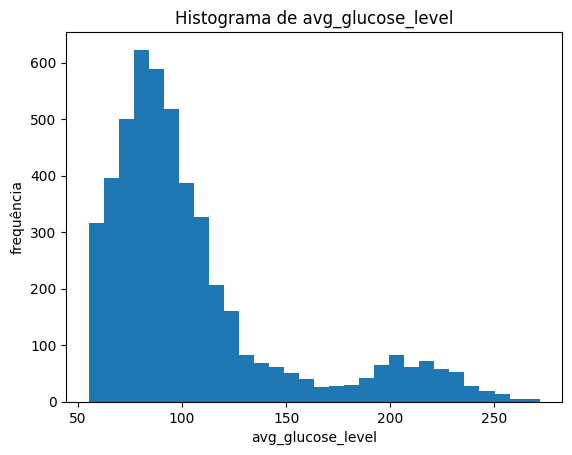

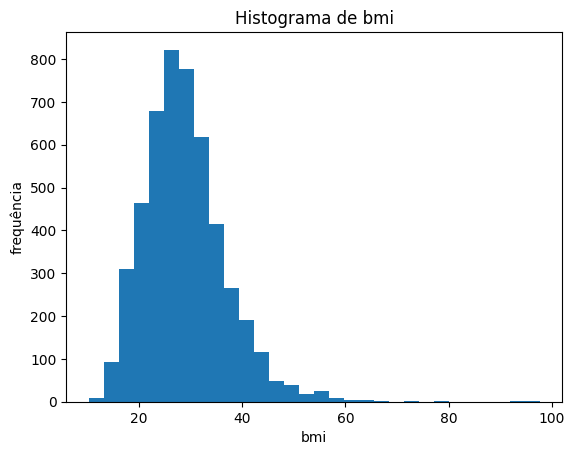

In [34]:
num_cols = ["age_group", "avg_glucose_level", "bmi"]

for c in num_cols:
    plt.figure()
    plt.hist(df[c].dropna(), bins=30)
    plt.title(f"Histograma de {c}")
    plt.xlabel(c)
    plt.ylabel("frequência")
    plt.show()


## Observações histrograma

Aqui algumas informações entendendo de IMC, nível de glucose, e ainda o grupo de idade na quantidade de registros do dataset.

In [35]:
# Alvo e preditores
y = df["stroke"].astype(int)
X = df.drop(columns=["stroke"])

# Colunas categóricas (category ou object) e numéricas
cat_cols = X.select_dtypes(include=["category", "object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["category", "object"]).columns.tolist()

pre = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop"
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

baseline = Pipeline([
    ("prep", pre),
    ("tree", DecisionTreeClassifier(
        random_state=42,
        class_weight="balanced"
    ))
])

baseline.fit(X_train, y_train)
pred_b = baseline.predict(X_test)
proba_b = baseline.predict_proba(X_test)[:,1]

print("== Baseline (sem poda) ==")
print(classification_report(y_test, pred_b, digits=3))
print("ROC AUC:", roc_auc_score(y_test, proba_b))


== Baseline (sem poda) ==
              precision    recall  f1-score   support

           0      0.962     0.957     0.959      1176
           1      0.121     0.135     0.127        52

    accuracy                          0.922      1228
   macro avg      0.541     0.546     0.543      1228
weighted avg      0.926     0.922     0.924      1228

ROC AUC: 0.5456240188383046


## Árvore de decisão (sem podas)

Ainda sem podas, a acurácia era de 92%, a partir dos valores do dataset de AVC, sendo assim, necessárias os ajustes ainda para melhores valores de decisão, pois baixa para detectar o AVC.

- **IMPORTANTE**: Como o dataset é desbalanceado, e temos somente 4,5% dos casos de todo o dataset de AVC. Precisamos levar em conta outro parãmetro que não a acurácia, mesmo que alta. Pois temos um estudo baixo de 54%, que é de ROC AUC;

### Explicação de valores

#### Classe 0 (sem AVC)

- precision=0.958 → de todos que o modelo previu como “sem AVC”, 95,8% estavam corretos.

- recall=0.958 → de todos que realmente não tiveram AVC, o modelo encontrou 95,8%.

- f1-score=0.958 → média harmônica entre precision e recall → ótimo equilíbrio.

#### Classe 1 (com AVC)

- precision=0.058 → só 5,8% das previsões de AVC estavam corretas.

- recall=0.058 → de todos os pacientes que tiveram AVC, o modelo achou só 5,8%.

- f1-score=0.058 → péssimo equilíbrio → o modelo quase não detecta AVC.


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# PRÉ-PODA (tuning estrutural da árvore) =====
pre_pruned = Pipeline([
    ("prep", pre),
    ("tree", DecisionTreeClassifier(
        random_state=42,
        class_weight="balanced",
        max_depth=5,
        min_samples_leaf=50,  # folha mínima (evita overfitting)
        min_samples_split=100 # mínimo p/ dividir (evita ramos frágeis)
    ))
])

print("== Pre-pount (pré-poda) ==")

pre_pruned.fit(X_train, y_train)
pred_pre  = pre_pruned.predict(X_test)
proba_pre = pre_pruned.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score

print("== PRÉ-PODA ==")
print("Acurácia :", accuracy_score(y_test, pred_pre))
print("ROC AUC  :", roc_auc_score(y_test, proba_pre))


== Pre-pount (pré-poda) ==
== PRÉ-PODA ==
Acurácia : 0.6905537459283387
ROC AUC  : 0.8011839351125065


### Árvore de decisão (pré-poda)

Aqui temos uma pré-poda, limitando um pouco mais os parâmetros da árvore, gerando mais ligibilidade, e melhor ainda, melhorando o parâmento de ROC AUC, como agora temos mais equilíbrio de 80%.

Porém ainda assim a acurácia, ainda assim estão bastante baixas, e assim o que podemos entender disso.

### Acurácia menor, e ROC AUC maior:

- ROC = Receiver Operating Characteristic.

- AUC = Area Under the Curve (área sob a curva).

Essa métrica mede o quão bem o modelo consegue separar as classes em diferentes limiares de decisão.

- 0.5 = modelo aleatório (puro chute). A partir de um overfitting, decorando dados sobre AVC negativo.

- 1.0 = modelo perfeito.

- 0.80 = muito bom → significa que, escolhendo um paciente ao acaso, o modelo tem 80% de chance de dar uma pontuação mais alta ao que realmente teve AVC do que ao que não teve.


**É a métrica mais confiável em datasets desbalanceados como esse, muito melhor do que a acurácia.**

In [47]:
for alpha in [0.0, 0.0001, 0.0005, 0.001, 0.005, 0.01]:
    model = Pipeline([
        ("prep", pre),
        ("tree", DecisionTreeClassifier(
            random_state=42,
            class_weight="balanced",
            max_depth=5,
            min_samples_leaf=50,
            min_samples_split=100,
            ccp_alpha=alpha
        ))
    ])
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    pred  = model.predict(X_test)
    from sklearn.metrics import accuracy_score
    print(f"\nccp_alpha={alpha}")
    print("Acurácia :", accuracy_score(y_test, pred))
    print("ROC AUC  :", roc_auc_score(y_test, proba))



ccp_alpha=0.0
Acurácia : 0.6905537459283387
ROC AUC  : 0.8011839351125065

ccp_alpha=0.0001
Acurácia : 0.6905537459283387
ROC AUC  : 0.8011839351125065

ccp_alpha=0.0005
Acurácia : 0.6905537459283387
ROC AUC  : 0.8010204081632653

ccp_alpha=0.001
Acurácia : 0.6905537459283387
ROC AUC  : 0.8010204081632653

ccp_alpha=0.005
Acurácia : 0.7157980456026058
ROC AUC  : 0.7997448979591837

ccp_alpha=0.01
Acurácia : 0.5920195439739414
ROC AUC  : 0.7741774594453166


In [48]:
# PÓS-PODA (ccp_alpha)
post_pruned = Pipeline([
    ("prep", pre),
    ("tree", DecisionTreeClassifier(
        random_state=42,
        class_weight="balanced",
        max_depth=5,
        min_samples_leaf=50,
        min_samples_split=100,
        ccp_alpha=0.005  # ajuste: 0.0, 0.0005, 0.001, 0.005...
    ))
])

post_pruned.fit(X_train, y_train)
pred_post  = post_pruned.predict(X_test)
proba_post = post_pruned.predict_proba(X_test)[:, 1]

print("== PÓS-PODA ==")
from sklearn.metrics import accuracy_score
print("Acurácia :", accuracy_score(y_test, pred_post))
print("ROC AUC  :", roc_auc_score(y_test, proba_post))


== PÓS-PODA ==
Acurácia : 0.7157980456026058
ROC AUC  : 0.7997448979591837


### Árvore pós-poda

Agora para a pós poda, podemos usar um parâmetro de ccp_alpha, explicando:

#### ccp_alpha Cost Complexity Pruning

**Esse valor controla a penalização por complexidade:**

- ccp_alpha=0.0 → árvore completa (sem poda).

- Valores maiores (0.0001, 0.001, 0.005…) → removem ramos fracos, simplificando a árvore.

### Estudo

Para melhorar, fiz um código, para poder testar os dois principais parâmetros, de acurácia de ROC AUC, para que eu possa ver qual se encaixa melhor, a partir de diferentes números de penalização de complexidade

- Identifiquei que havia um equilíbrio maior, entre porcentagens de acima de 70% entre os dois, quando tinha 0.005 de penalização por erro. Então usando isso na pós poda da árvore, seria melhor para combinar os dois, tendo legibilidade, complexidade e estudos bons na árvore de decisão final;


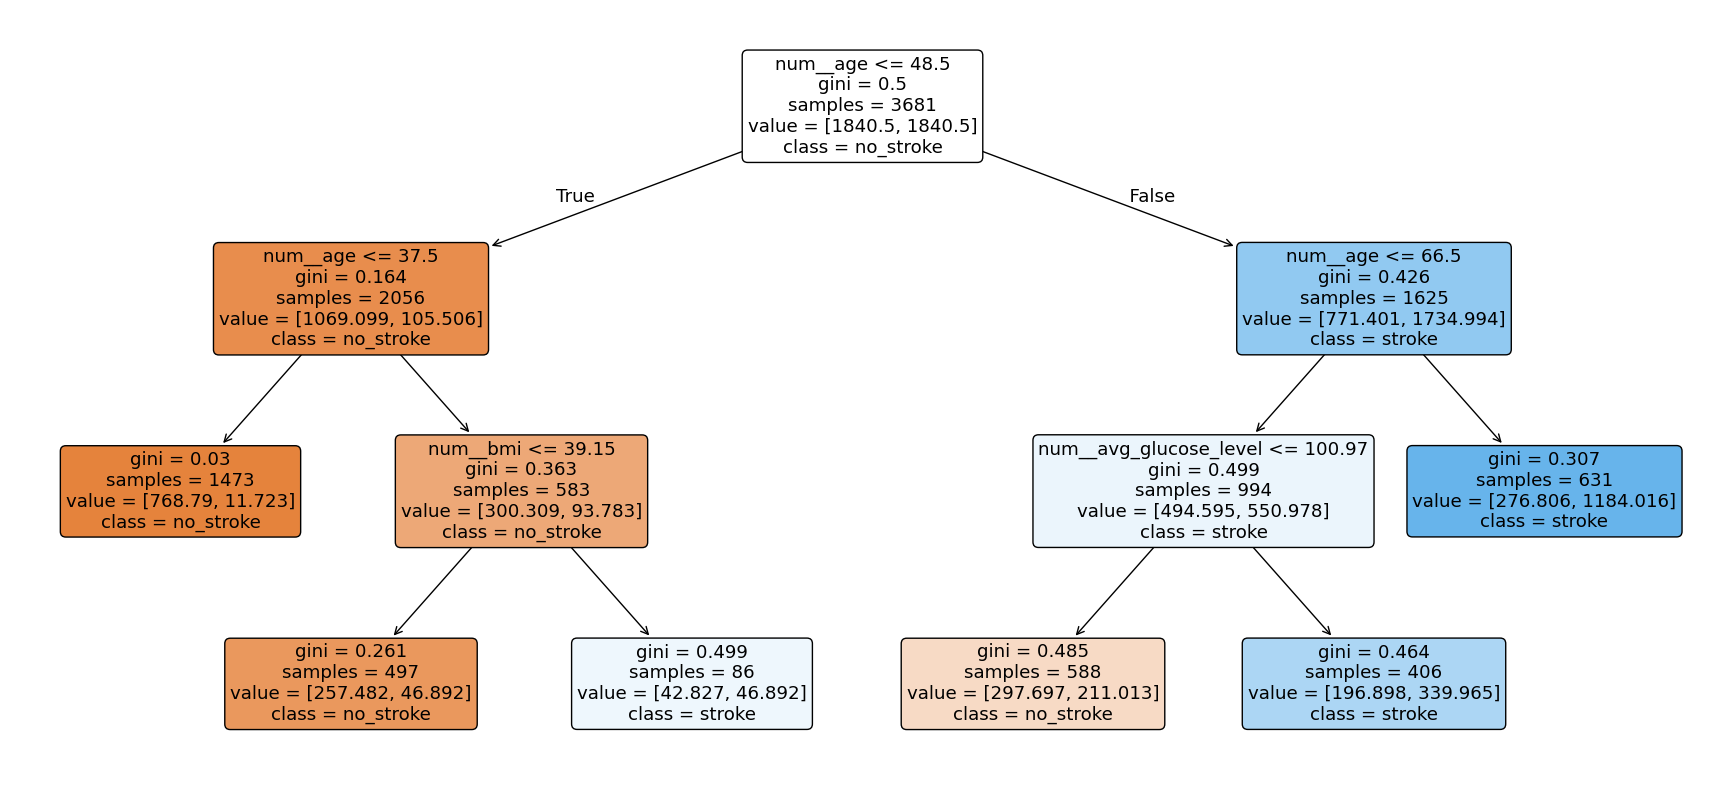

In [51]:
from sklearn import tree
import matplotlib.pyplot as plt

clf_post = post_pruned.named_steps["tree"]  # pega a árvore dentro do pipeline

plt.figure(figsize=(22,10))
tree.plot_tree(
    clf_post,
    filled=True,
    rounded=True,
    feature_names=pre.get_feature_names_out(),
    class_names=["no_stroke", "stroke"],
    max_depth=3   # só até a profundidade 3 pra não ficar gigante
)
plt.show()


## Lado ESQUERDO (mais jovens)

### Nó 1E

- Regra: age <= 37.5

- gini = 0.164, samples ≈ 2056, classe: no_stroke

- **Interpretação: quase puro de não-AVC. A maioria absoluta é negativa.**

### Folha 1E-A

- gini ≈ 0.03, samples ≈ 1473, classe: no_stroke

- **Leitura: região de baixíssimo risco. Jovens (≤37.5) formam um grupo muito limpo de não-AVC.**

- Nó 1E-B

- Regra: bmi <= 39.15

- gini = 0.363, samples ≈ 583, classe: no_stroke

- **Leitura: ainda predomina não-AVC, mas o IMC começa a separar os poucos casos positivos.**

---

### Folha 1E-B-1: gini ≈ 0.261, samples ≈ 497, classe: no_stroke

→ **jovens com IMC menor continuam majoritariamente sem AVC.**

### Folha 1E-B-2: gini ≈ 0.499, samples ≈ 86, classe: stroke

→ **pequeno grupo de jovens com IMC alto (~>39) onde a proporção de AVC se aproxima de 50%. Aqui a árvore encontrou um subgrupo de alto risco entre os jovens.**

---

## Lado DIREITO (mais velhos)
### Nó 1D

- Regra: age <= 66.5

- gini = 0.426, samples ≈ 1625, classe: stroke

- **Leitura: para 48.5 < idade ≤ 66.5, já há muito mais AVC que no lado esquerdo.**

---

### Nó 1D-A

- Regra: avg_glucose_level <= 100.97

gini = 0.499, samples ≈ 994, classe: stroke

- **Leitura: faixa de idade intermediária em que a glicose vira driver. Abaixo de ~101, o nó fica quase 50/50 (gini alto).**

---

### Folha 1D-A-1: gini ≈ 0.485, samples ≈ 588, classe: no_stroke
→ nesse subgrupo (glicose mais baixa) prevalece não-AVC, mas por pouco.

### Folha 1D-A-2: gini ≈ 0.464, samples ≈ 406, classe: stroke
→ com glicose mais alta (acima do limiar), o risco sobe e passa a predominar AVC.

---

### Folha 1D-B

- gini = 0.307, samples ≈ 631, classe: stroke
→ Para idosos ( >66.5 ), a prevalência de AVC é bem maior e o nó é relativamente puro de positivos.

---

## Resumo da árvore:

- **Idade é o fator #1.**

Em jovens, quase tudo é negativo, exceto jovens com IMC muito alto, onde há um bolsão “quase metade” de positivos.

Em meia-idade/idosos, glicose e IMC ajudam a separar — com idosos (>66.5) puxando forte para AVC.

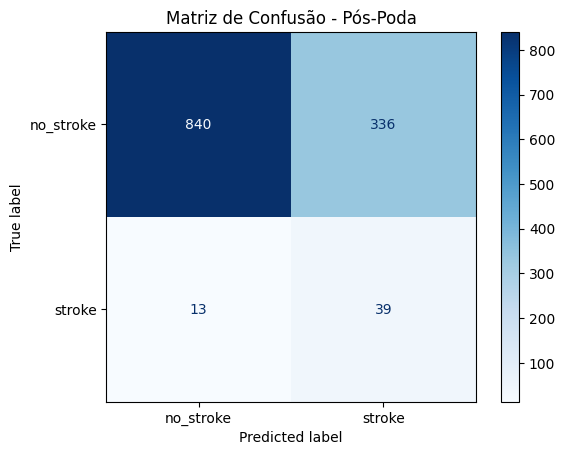

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    post_pruned, X_test, y_test,
    display_labels=["no_stroke", "stroke"],
    cmap="Blues"
)
plt.title("Matriz de Confusão - Pós-Poda")
plt.show()


### Gráfico de confusão (pós-poda)

O modelo privilegia sensibilidade (pegar quem tem AVC) mesmo que gere muitos falsos positivos. Em saúde/triagem, isso costuma ser aceitável: melhor não perder casos reais, e depois filtrar os FP com exames/avaliações adicionais.

#### Métricas-chave:

- Acurácia: (840 + 39) / 1228 ≈ 0,716

- Recall (sensibilidade) classe 1: 39 / (39 + 13) = 0,75

- O modelo encontra 75% dos AVC reais — bom para triagem.

- Precisão classe 1: 39 / (39 + 336) ≈ 0,104

- Muitos falsos positivos (aceita “alarmar” bastante para não perder positivos).

- Especificidade (classe 0): 840 / (840 + 336) ≈ 0,714

- NPV: 840 / (840 + 13) ≈ 0,985 (quando diz que não é AVC, quase sempre acerta)

- ROC AUC ≈ 0,80 (você já mediu): boa capacidade de separação global em vários limiares.

## Outros treinamentos

É entendido, que caso queira usar outras métricas, podemos melhorar as duas, assim gerando o melhor ou menos equilíbrio dos dois parâmetros.

Então se quisermos por exemplo, reduzir os falsos positivos para os casos, podemo subir o limiar da pós poda, e assim diminuir a classe para menor balanceamento, teríamos mais precisão

Porém acredito que para essa análise, estó aceitável, acima de 70%, um bom equilíbrio.